In [19]:
%pylab inline
#import matplotlib as plt
#import numpy as np
import pandas as pd
import uncertainties
from uncertainties import unumpy as unp
from uncertainties import ufloat

def gaussian(x, mu, sigma, B, A):
    return A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B

def gausfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, mu, sigma, B, A: A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B,
                  p0=p0)


def fit_pm(x, y, func=lambda x: x, p0=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2


def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        return x


def err(x):
    from uncertainties import unumpy
    return unumpy.std_devs(x)

Populating the interactive namespace from numpy and matplotlib


In [20]:
df = pd.read_csv("out_sample.csv")

df_ins = pd.read_csv("in_sample_or.csv")


# Out Sample Error

In [21]:
df = pd.read_csv("out_sample.csv")

ch1=df.iloc[1:,1]
ch2 = df.iloc[1:,2]

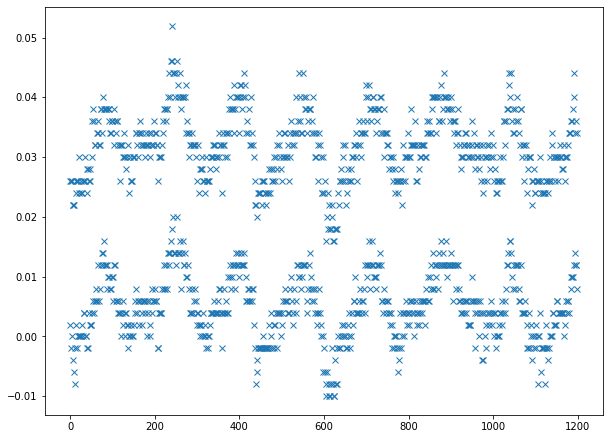

In [22]:
x = np.arange(len(ch1))

y = [float(item) for item in ch1.to_numpy()]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x,y,"x")
#plt.ylim(-10,50)
#ax = plt.gca()
#ax.tick_label(float(ch1.to_numpy()))
plt.show()

In [23]:
y=array(y)
ynew=abs(y[0::2]-y[1::2])


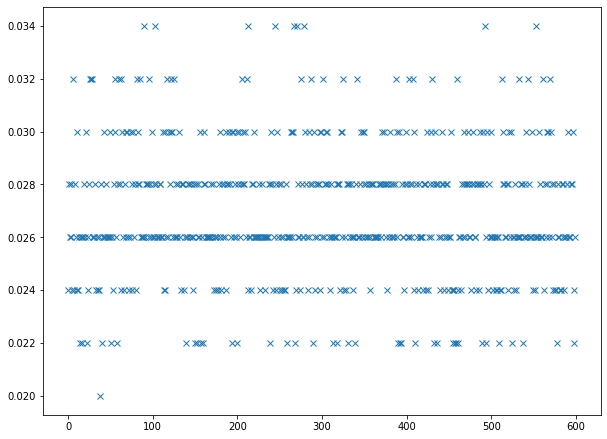

In [24]:
plt.plot(ynew,"x")

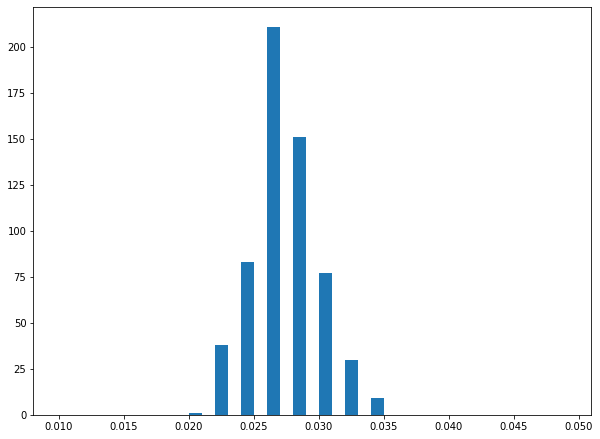

In [7]:
bins = plt.hist(ynew,bins=np.arange(0.01,0.05,0.001))

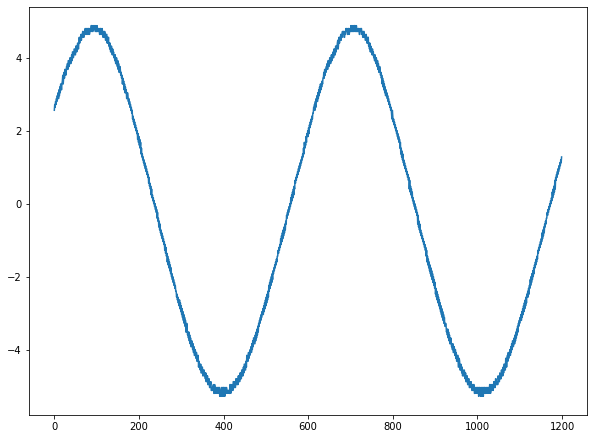

In [8]:
plt.plot(np.arange(len(ch2)),[float(item) for item in ch2])

# In sample Error

In [9]:
df_ins = pd.read_csv("in_sample_or.csv")
ch1_ins = df_ins.iloc[1:,1]
ch2_ins = df_ins.iloc[1:,2]

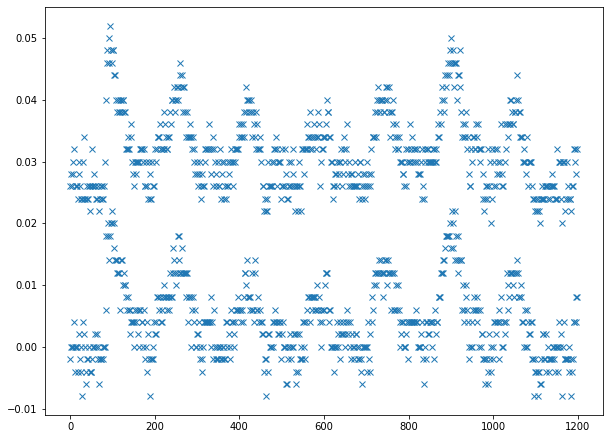

In [10]:
x_ins = np.arange(len(ch1_ins))

y_ins = [float(item) for item in ch1_ins.to_numpy()]

plt.plot(x_ins,y_ins,"x")
#plt.ylim(-10,50)
#ax = plt.gca()
#ax.tick_label(float(ch1.to_numpy()))
plt.show()

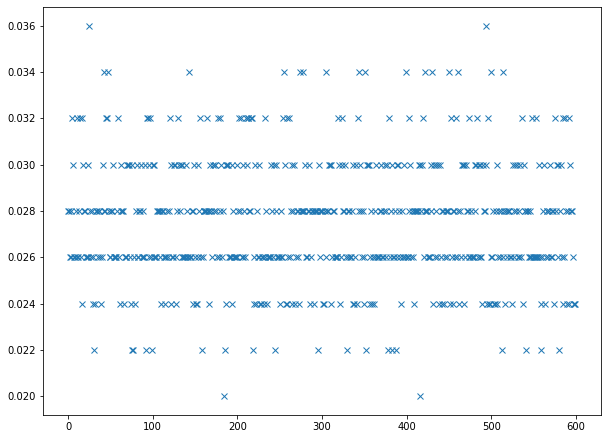

In [11]:
y_ins=array(y_ins)
ynew_ins=abs(y_ins[0::2]-y_ins[1::2])
plt.plot(ynew_ins,"x")

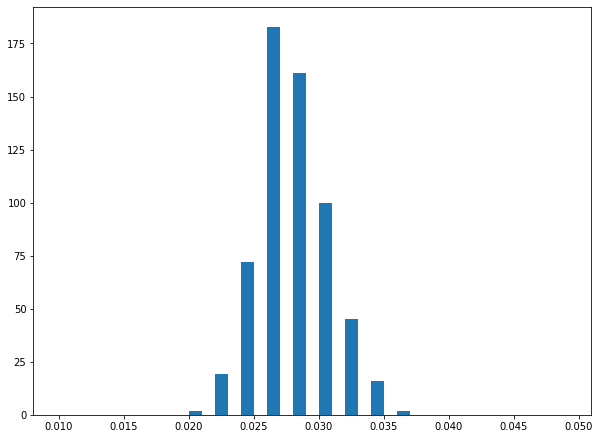

In [12]:
bins_ins = plt.hist(ynew_ins,bins=np.arange(0.01,0.05,0.001))

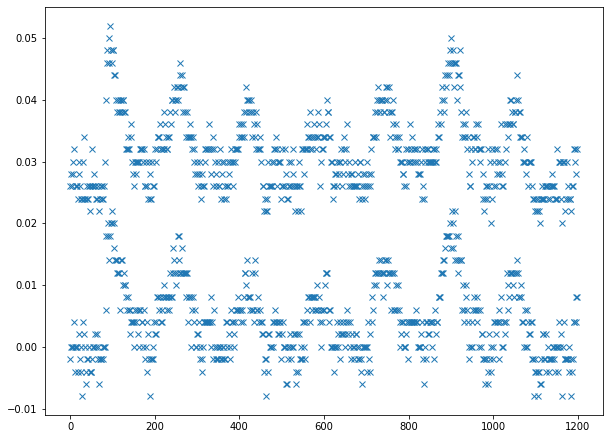

In [13]:
x_ins = np.arange(len(ch1_ins))

y_ins = array([float(item) for item in ch1_ins.to_numpy()])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x_ins,y_ins,"x")
#plt.ylim(-10,50)
#ax = plt.gca()
#ax.tick_label(float(ch1.to_numpy()))
plt.show()

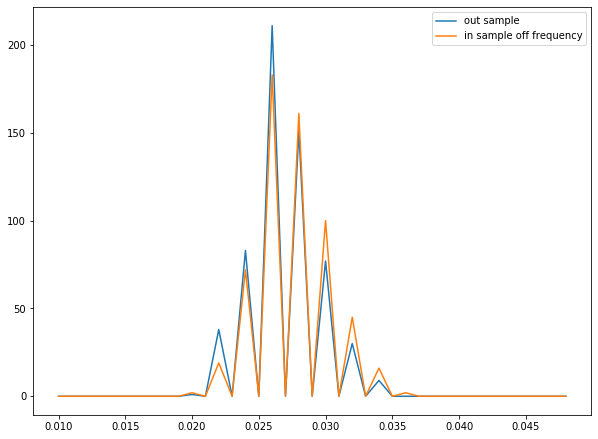

In [14]:
plt.plot(bins[1][0:-1], bins[0],label="out sample")
plt.plot(bins_ins[1][0:-1], bins_ins[0],label="in sample off frequency")
plt.legend()
plt.show()

# Fit to in sample of frequency

mu 0.02720+/-0.00018
sigma 0.00248+/-0.00025
 Offset5+/-9
 Amplitude180+/-13


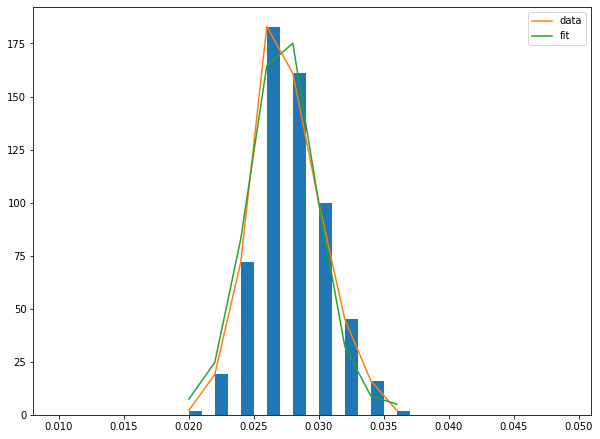

In [17]:
bins_ins = plt.hist(ynew_ins,bins=np.arange(0.01,0.05,0.001))
errfit_x,errfit_y = bins_ins[1][0:-1], bins_ins[0]



internalx,internaly = [],[]
for i in range(len(errfit_y)):
    if errfit_y[i] != 0:
        internalx.append(errfit_x[i])
        internaly.append(errfit_y[i])
errfit_x = array(internalx)
errfit_y = internaly

[params,errs] = gausfit_pm(errfit_x,errfit_y)
print("mu {:}\nsigma {:}\n Offset{:}\n Amplitude{:}".format(*params))

plt.plot(errfit_x,errfit_y,label="data")
plt.plot(errfit_x,gaussian(errfit_x,*val(params)),label="fit")

plt.legend()
plt.show()